# Lab03 - Joanna Wójcicka

In this notebook, we perform a convergence analysis of the upwind scheme applied to the 1D linear advection equation. The objective is to investigate how the numerical error changes as we refine the spatial (dx) or temporal (dt) resolution.

Convergence analysis helps assess the accuracy and efficiency of a numerical method. In this case, we use the Root Mean Squared Error (RMSE) between the numerical and analytical solutions as a measure of error. The RMSE is calculated as:

$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (u_{exact} - u_{numerical})^2}$$
Where:
- $N$ is the number of grid points
- $u_{exact}$ is the analytical solution (shifted initial condition)
- $u_{numerical}$ is the numerical solution computed using the upwind scheme

We maintain a constant Courant number C to ensure stability and consistency across tests. The Courant number controls the relationship between time and space discretization:

$$C = \frac{u \Delta t}{\Delta x}$$
Where:
- $u$ is the advection speed
- $\Delta t$ is the time step
- $\Delta x$ is the grid spacing

As dx decreases (finer grid), the RMSE should decrease, indicating that the numerical solution is converging toward the exact solution. For the first-order upwind scheme, the error typically decreases linearly with dx (O(dx)).

Import of libraries and global parameters

In [332]:
import numpy as np
import matplotlib.pyplot as plt

Functions for the upwind scheme

In [333]:
class One:
    def __radd__(self, other):
        return slice(other.start + 1, other.stop + 1)
    def __rsub__(self, other):
        return slice(other.start - 1, other.stop - 1)

class Psi_0:
    def __init__(self):
        self.x0 = 5
        self.a = 1
        self.sigma = 25
    def __call__(self, x):
        return self.a * np.exp(-(x-self.x0)**2 / 2 / self.sigma**2)

In [334]:
def F(psi_L, psi_R, C):
    return (C + np.abs(C)) / 2 * psi_L + (C - np.abs(C)) / 2 * psi_R

def C(u, dt, dx):
    return u * dt / dx

def upwind(psi, dx, dt, nt, u):
    one = One()
    i = slice(1, nt - 2)
    for _ in range(nt):
        psi[i] = psi[i] - (F(psi[i], psi[i+one], C(u, dt, dx)) - F(psi[i-one], psi[i], C(u, dt, dx)))
    return psi

Main class for the solution. It calculates the error for different grid spacings and plots the RMSE vs. dx.

In [335]:
class Solution:
    def __init__(self, u, c, total_time):
        self.u = u              # Advection speed
        self.c = c              # Courant number
        self.total_time = total_time
        self.psi_0 = Psi_0()    # Initial Gaussian pulse
        self.dx_values = []     # Store dx values for plotting
        self.errors = []        # Store errors for each test case

    def run_single_case(self, dx):
        nx = 400 * dx
        x, dx = np.linspace(-100, 300, nx, endpoint=False, retstep=True)
        dt = self.c * dx / self.u
        nt = int(self.total_time / dt)
        # Numerical solution using upwind
        psi_initial = self.psi_0(x)
        psi_numerical = upwind(psi_initial, dx, dt, nt, self.u)
        # Analytical solution (shifted initial condition)
        psi_exact = self.psi_0(x - self.u * self.total_time)

        return psi_exact, psi_numerical

    def run_tests(self, dx_start=1, dx_end=50):
        for dx in range(dx_start, dx_end + 1):
            psi_exact, psi_numerical = self.run_single_case(dx)
            self.dx_values.append(dx)
            self.errors.append(np.sqrt(np.mean((psi_numerical - psi_exact) ** 2)))
        self.errors = np.array(self.errors)

    def plot_errors(self):
        error = self.errors[::-1]
        plt.figure(figsize=(8, 6))
        plt.plot(self.dx_values, error, label='Upwind Scheme')
        plt.xlabel('dx (Grid Spacing)')
        plt.ylabel('Root Mean Squared Error (RMSE)')
        plt.title('Upwind Scheme Error vs. Grid Spacing')
        plt.legend()
        plt.grid(True)
        plt.show()


# Outcome
The error increases as dx gets bigger, confirming the expected convergence behavior of the upwind method.

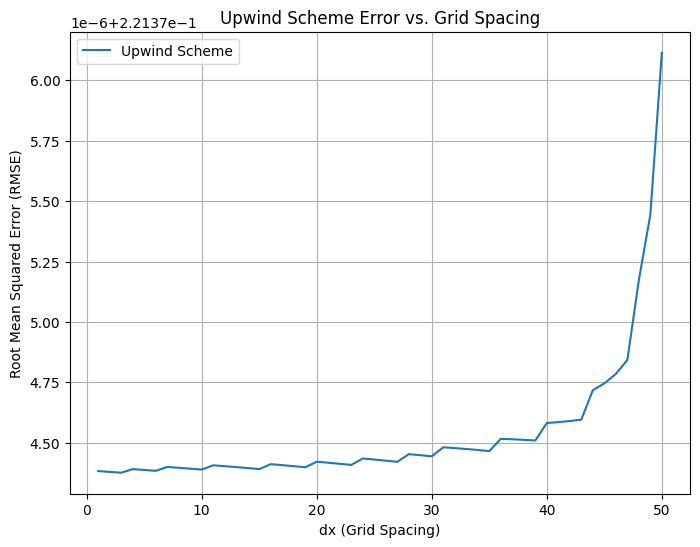

In [336]:
solution = Solution(u=0.5, c=0.8, total_time=50)
solution.run_tests()
solution.plot_errors()